<a href="https://colab.research.google.com/github/kattly/side_projects/blob/master/lapsim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Point Mass Laptime Simulation**
## **Introduction**

We would like to know the effects of changing various parameters when designing a race car. We'll be analyzing the sensitivities of the following high-level parameters on a 75m straight-line acceleration event:
1. Aerodynamics
  * Drag, $C_d$
  * Downforce, $C_{df}$
  * Cross-sectional Area, $A$
2. Mass, $m$
3. Tire Friction, $\mu$

### Vehicle Setup

In [ ]:
# Set-up code with sample vehicle parameters in a dictionary
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

vehicle = {       # Sample vehicle parameters
    "mass": 200,  # Mass of whole car, kg
    "area": 1.3,  # Cross-sectional area, m^2
    "C_d" : 1.5,  # Coefficient of drag
    "C_df": 4.0,  # Coefficient of downforce
    "mu"  : 1.5,  # Tire coefficient of friction
}
print(vehicle)

# Read in the track csv TODO: get track.csv 
filtered_track = pd.read_csv("/content/track.csv")

# This part is just to visualize the track that we've loaded
sctt = plt.scatter(filtered_track.Latitude, filtered_track.Longitude)
plt.colorbar(sctt)

# **Equations of Motion**
1. Let's find all the forces acting on the car:
  * Weight of the car
    * $F_z = mg$
    * Gravity: $g$ = 9.81 $m/s^2$
    * Acting downwards
  * Downforce
    * $F_{df} = \frac{1}{2} \rho_{air} C_{df} A_{cross} v^2$
    * Air density: $\rho_{air}$ = 1.28 $kg/m^3$
    * Forward velocity $v$ changes over time
    * Acting downwards
  * Drag
    * $F_d = \frac{1}{2} \rho_{air} C_{d} A_{cross} v^2$
    * Acting opposite direction of motion
  * Tire friction
    * $F_t = \mu F_{normal} = \mu (F_z + F_{df}) = \mu (mg + F_{df})$
    * Pushing vehicle forwards 

2. Adding up all the forces acting on our car's forward motion, we get the total force propelling the car:
  * $F_{total, x} = F_t - F_d$

3. Recall Newton's 2nd Law stating $F = ma$, thus we can calculate the resultant acceleration at every *i*th time step:
  * $a_{i} = \frac{F_{total, x}}{m} = \frac{F_t - F_d}{m}$

4. Recall our kinematic relationships between position $x$, velocity $v$, and acceleration $a$. For every *i*th time step:
  * $x_{i+1} = x_{i} + v_{i} \Delta t$
  * $v_{i+1} = v_{i} + a_{i} \Delta t$

In summary, for every time step *i* until we reach a displacement $x$ of 75m, we must solve the following:

1. $F_{df} = \frac{1}{2} \rho_{air} C_{df} A_{cross} v_{i}^2$
2. $F_{d} = \frac{1}{2} \rho_{air} C_{d} A_{cross} v_{i}^2$
3. $F_t = \mu (mg + F_{df})$
4. $a_{i} = \frac{F_t - F_d}{m}$
5. $x_{i+1} = x_{i} + v_{i} \Delta t$
6. $v_{i+1} = v_{i} + a_{i} \Delta t$

In [ ]:
# Calculate all the forces
F_z = vehicle["mass"] * 9.81




dict_keys(['mass', 'area', 'C_d', 'C_df', 'mu'])

# To be deleted


In [ ]:
track = pd.read_csv("/RRData.csv")
print(track)


print(track.columns)
print(max(track['Altitude (m)']) - min(track['Altitude (m)']))

Index(['Time', 'Lap', 'GPS_Update', 'GPS_Delay', 'Accuracy (m)', 'Latitude',
       'Longitude', 'Altitude (m)', 'Speed (MPH)', 'Heading', 'X', 'Y', 'Z',
       'OBD_Update', 'Engine Speed (RPM) *OBD', 'Accelerator Pedal (%) *OBD'],
      dtype='object')
39.0


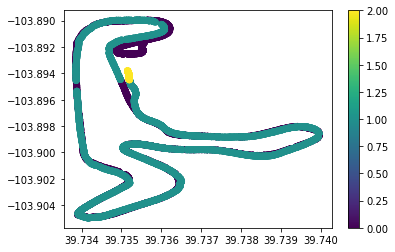

In [ ]:
sctt = plt.scatter(track.Latitude, track.Longitude, c=track['Lap'])
plt.colorbar(sctt)

Index(['Latitude', 'Longitude'], dtype='object')


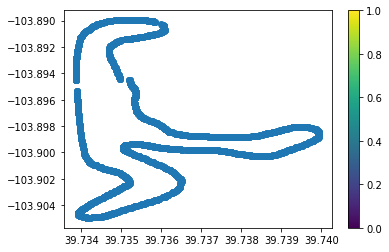

In [ ]:
# filtered_track = track[track['Lap']==2]
filtered_track = track[track['Lap']==1][['Latitude', 'Longitude']]
sctt = plt.scatter(filtered_track.Latitude, filtered_track.Longitude)
plt.colorbar(sctt)

# Calculate curvature at each point
curvature = []
for i in range(0, len(filtered_track.Latitude)):
  curvature.append()

In [ ]:
# Write to a new csv file?
filtered_track.to_csv('/content/track.csv', index=False)

In [ ]:
print(filtered_track)

       Latitude   Longitude
3427  39.734973 -103.894463
3428  39.734973 -103.894463
3429  39.734973 -103.894463
3430  39.734973 -103.894463
3431  39.734958 -103.894362
...         ...         ...
6438  39.735203 -103.894530
6439  39.735203 -103.894530
6440  39.735202 -103.894507
6441  39.735202 -103.894507
6442  39.735202 -103.894507

[3016 rows x 2 columns]
